# Data Science Salary Analysis Questions

### Features
- **work_year**: The year of the data related to the job salary.
- **experience_level**: The level of experience of the employee (e.g., entry-level, mid-level, senior-level).
- **employment_type**: The type of employment (e.g., full-time, part-time, contract).
- **job_title**: The title or role of the employee within the data science field.
- **salary**: The salary of the employee.
- **salary_currency**: The currency in which the salary is denoted.
- **salary_in_usd**: The salary converted to US dollars for standardization.
- **employee_residence**: The residence location of the employee.
- **remote_ratio**: The ratio of remote work allowed for the position.
- **company_location**: The location of the company.
- **company_size**: The size of the company based on employee count or revenue.

## Data Setup

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter, ScalarFormatter

df = pd.read_csv('DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [278]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


## Removing outliers

In [279]:
def remove_outliers_by_year(df, year_col='work_year', num_std=2):
    """
    Remove outliers from a pandas DataFrame year by year using the standard deviation method.
    
    Parameters:
    - df: pandas DataFrame from which outliers will be removed.
    - year_col: Name of the column in `df` that contains year information.
    - num_std: Number of standard deviations from the mean. Values outside
               this range will be considered outliers. Default is 3.
    
    Returns:
    - A new DataFrame with outliers removed from numeric columns for each year.
    """
    def remove_outliers(group):
        numeric_cols = group.select_dtypes(include=[np.number]).columns.tolist()
        if year_col in numeric_cols:
            numeric_cols.remove(year_col)
        
        mean = group[numeric_cols].mean()
        std = group[numeric_cols].std()
        
        non_outlier_condition = ((group[numeric_cols] >= (mean - num_std * std)) & 
                                 (group[numeric_cols] <= (mean + num_std * std)))
                                 
        return group[non_outlier_condition.all(axis=1)]
    
    return df.groupby(year_col, as_index=False, group_keys=False).apply(remove_outliers)

df = remove_outliers_by_year(df, 'work_year')



/tmp/ipykernel_152088/2414909232.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(year_col, as_index=False, group_keys=False).apply(remove_outliers)


## Trend Analysis
1. **How have average data science salaries evolved from 2020 to 2024?**
2. **What is the trend in the number of data science roles reported over the years?**



In [280]:
def plot_positions_with_trend(ax, df, column_name, ylabel, title):
    """
    Plots a bar chart with a trend line and annotations on a given axes.
    
    Parameters:
    - ax: Matplotlib axes object where the plot will be drawn.
    - df: DataFrame containing the data to be plotted. Assumes the DataFrame's index is what you want to plot on the x-axis.
    - column_name: Name of the column in the DataFrame to plot.
    - ylabel: Label for the Y-axis.
    - title: Title of the chart.
    """
    # Plot the bar chart on the provided axes
    df[column_name].plot(kind='bar', color='skyblue', ax=ax)

    # Adding the count in scientific notation above the bars
    for index, value in enumerate(df[column_name]):
        ax.text(index, value, f"{value:.2e}", ha='center', va='bottom')

    # Calculating the trend curve
    x = np.arange(len(df.index))
    y = df[column_name].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Adding the trend curve to the chart
    ax.plot(x, p(x), "r--")

    # Aesthetic improvements
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df.index, rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


def plot_bar_with_trend_and_annotations(ax, data, x_col, y_col, hue_col, hue_legend_title, x_label, y_label, annotate=True):
    """
    Plots a bar plot with trend lines and annotations for each category defined by `hue_col`.
    """
    sns.set(style="whitegrid")
    palette = sns.color_palette("pastel")
    hue_order = ['EN', 'MI', 'SE', 'EX']

    sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col, ax=ax, palette=palette, hue_order=hue_order, width=0.9)
    
    # Determine the most appropriate unit and factor for simplifying the y-axis values
    max_value = data[y_col].max()
    if abs(max_value) >= 1e6:
        unit, factor = 'M', 1e6
    elif abs(max_value) >= 1e3:
        unit, factor = 'K', 1e3
    else:
        unit, factor = '', 1

    # Function to format the tick labels
    def tick_formatter(value, pos):
        return f"{value / factor:.0f}"
    
    ax.yaxis.set_major_formatter(FuncFormatter(tick_formatter))
    ax.set_ylabel(f"{y_label} ({unit})")

    if annotate:
        for p in ax.patches:
            # Annotate using the simplified value
            value = p.get_height() / factor
            ax.annotate(f'{value:.0f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=9,
                        rotation=45)
    
    ax.set_title(f'{y_label} by {x_label} and {hue_legend_title}')
    ax.set_xlabel(x_label)
    ax.legend(title=hue_legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')


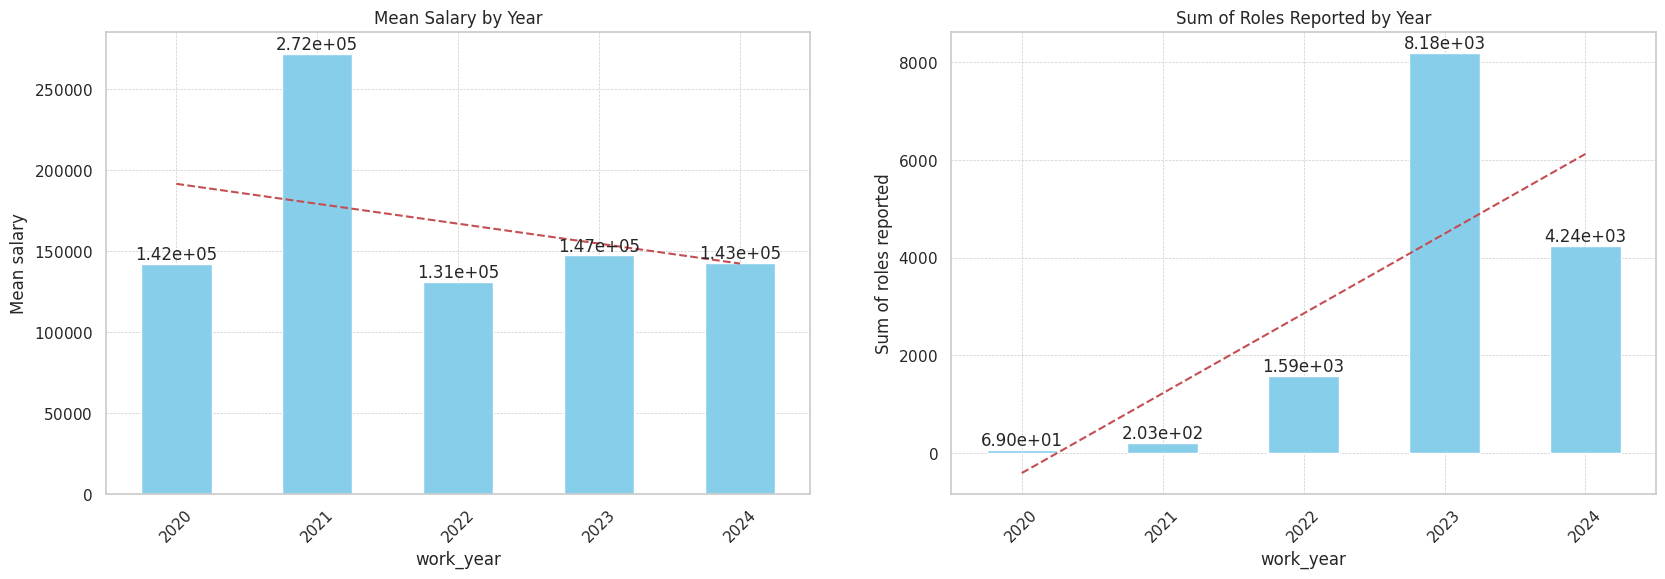

In [281]:
avg_salary_by_year = df[['work_year', 'salary']].groupby(['work_year']).mean()
positions_by_year = df[['work_year', 'experience_level']].groupby(['work_year']).count()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
plot_positions_with_trend(axs[0], avg_salary_by_year, 'salary', 'Mean salary', 'Mean Salary by Year')
plot_positions_with_trend(axs[1], positions_by_year, 'experience_level', 'Sum of roles reported', 'Sum of Roles Reported by Year')

plt.show()

## Experience Level Insights
3. **How does the average salary differ between junior and senior data science roles, and what factors contribute to the disparity?**
4. **Which experience level has seen the greatest increase in salaries over the covered years, and what could explain this trend?**



/tmp/ipykernel_152088/3943183320.py:45: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col, ax=ax, palette=palette, hue_order=hue_order, width=0.9)


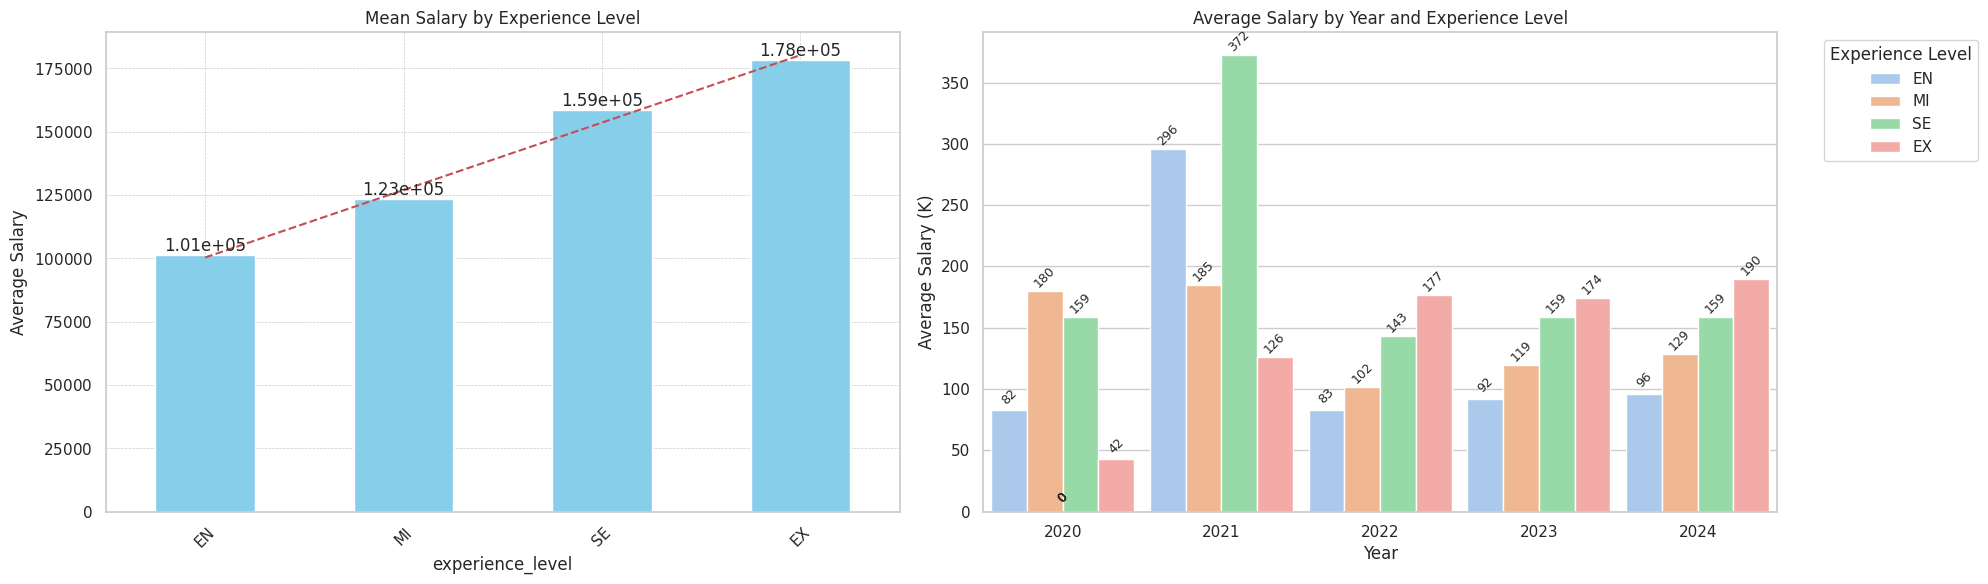

In [282]:
# Assuming 'df' is your original DataFrame
xp_level_x_salary = df[['experience_level', 'salary']].groupby(['experience_level']).mean().reindex(['EN', 'MI', 'SE', 'EX'])
average_salary_by_year_by_xp_level = df.groupby(['work_year', 'experience_level'])['salary'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
plot_positions_with_trend(axs[0], xp_level_x_salary, 'salary', 'Average Salary','Mean Salary by Experience Level')

# Utilizando a função generalizada para o segundo gráfico
plot_bar_with_trend_and_annotations(axs[1], average_salary_by_year_by_xp_level, 'work_year', 'salary', 'experience_level', 'Experience Level', 'Year', 'Average Salary')

plt.tight_layout()
plt.show()

## Employment Type and Work Arrangement
5. **Compare the median salaries across different employment types (Full-Time, Part-Time, Contract, Freelance) and analyze the potential reasons behind the differences.**
6. **Investigate how remote work (no remote, partially remote, fully remote) affects salaries in the data science field, considering other factors like experience level and company size.**



## Geographic Analysis
7. **Identify which country offers the highest average salary for data science professionals, taking into account the cost of living and currency strength.**
8. **Explore the salary differences between company locations and employee residences. Does working for a foreign company correlate with higher salaries?**




## Company Size Impact
9. **Analyze how company size (Small, Medium, Large) impacts the average salary of data science roles, and hypothesize why size matters.**



## Job Title Specific Analysis
10. **What are the most common job titles in the data science field based on this dataset, and how do their salaries compare?**
11. **Which job title receives the highest average salary, and how does this vary by company size and location?**
12. **For data scientists and machine learning engineers, how does experience level influence their salary, and what trends emerge within these specific roles?**



## Cross-Sectional Analysis
13. **Examine the distribution of employment types across different experience levels. Are more experienced professionals more likely to work in certain types of roles?**
14. **What is the relationship between the remote ratio and the size of the company, and how does this affect salary ranges?**



## Yearly Changes and Trends
15. **Identify job titles with the most significant salary changes over the years. What might be causing these fluctuations?**
16. **Analyze the evolution of salaries in the top-paying countries from 2020 to 2024. What geopolitical or economic factors might be influencing these changes?**



## Currency and Global Salary Comparison
17. **Which currencies are most commonly used for salaries, and how do these salary values compare when converted to USD, considering currency fluctuations?**



## High-Paid Role Characteristics
18. **Characterize the highest-paid data science roles in terms of experience level, job title, company size, and location. What common factors contribute to higher salaries?**



## Remote Work Dynamics
19. **What percentage of data science roles are fully remote, and how does this choice correlate with company size and salary?**



## Advanced Comparative Analysis
20. **Perform a comparative analysis between the salary trends of data scientists versus business analysts within the dataset. How do factors like experience level, company size, and geographical location influence the differences in their compensation?**